# Imports & definitions

In [1]:
%matplotlib widget

In [2]:
import os
import sympy as sm
import scipy as sp
import numpy as np
from scipy.special import hyp2f1
from matplotlib import pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as ticker
import sys
sys.path.append("/Users/jtlaune/Notes/notes/code_notebooks/")
from mpl_styles import analytic
from sympy import init_printing, init_session
init_session()
init_printing()

def Pochhammer(a, k):
    if k == 0:
        return 1.0
    else:
        return (a + k - 1) * Pochhammer(a, k - 1)


def b(s, j, alpha):
    if j >= 0:  # Eq. 7.87
        return (
            2
            * Pochhammer(s, j)
            / Pochhammer(1, j)
            * (alpha**j)
            * hyp2f1(s, s + j, j + 1, alpha * alpha)
        )
    else:  # Eq. 6.69
        return b(s, -j, alpha)


def Db(s, j, alpha):  # Eq. 6.70
    aux = (
        b(s + 1, j - 1, alpha) - 2 * alpha * b(s + 1, j, alpha) + b(s + 1, j + 1, alpha)
    )
    return s * aux


def D2b(s, j, alpha):  # Eq. 6.71
    aux = (
        Db(s + 1, j - 1, alpha)
        - 2 * alpha * Db(s + 1, j, alpha)
        - 2 * b(s + 1, j, alpha)
        + Db(s + 1, j + 1, alpha)
    )
    return s * aux


def f27lc(alpha, j):
    """
    f27 in MD p543
    (1/2)[−2 j − αD] b^(j)_{1/2}(α) x [e1cos(theta1)]
    """
    return -0.5 * (-2 * (j + 1) * b(0.5, j + 1, alpha) - alpha * Db(0.5, j + 1, alpha))


def f31lc(alpha, j):
    """
    f31 in MD p543
    (1/2)[−1 + 2 j + αD] b^(j-1)_{1/2}(α) x [e2cos(theta2)]
    """
    return -0.5 * ((-1 + 2 * (j + 1)) * b(0.5, j, alpha) + alpha * Db(0.5, j, alpha))


def sqr_ei_lc(alpha):
    """
    MD p275
    f3lc x [e1^2 + e2^2]
    (1/8)[2α_12 D + α_12^2 D^2]b_{1/2}^(0)
    """
    return 0.25 * alpha * Db(0.5, 0, alpha) + alpha**2 / 8 * 0.5 * (
        Db(1.5, 1, alpha)
        - 2 * alpha * Db(1.5, 0, alpha)
        + Db(1.5, 1, alpha)
        - 2 * b(1.5, 0, alpha)
    )


def eiej_lc(alpha):
    """
    MD p275
    f4lc x [e1e2]
    (1/4)[2 − 2α_12 D − α_12^2 D^2]b_{1/2}(1)
    """
    # These are the values given in Murray Dermott.
    # signs on C and D are to be consistent with Laetitia's notes
    # fs1
    return (
        0.5 * b(0.5, 1, alpha)
        - 0.5 * alpha * Db(0.5, 1.0, alpha)
        - 0.25
        * alpha**2
        * 0.5
        * (
            Db(1.5, 0, alpha)
            - 2 * alpha * Db(1.5, 1, alpha)
            + Db(1.5, 2, alpha)
            - 2 * b(1.5, 1, alpha)
        )
    )


IPython console for SymPy 1.11.1 (Python 3.11.5-64-bit) (ground types: python)

These commands were executed:
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.11.1/



# 8/30/23

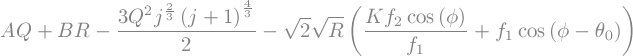

In [10]:
Q, R, th0, phi = symbols("Q R theta_0 phi")
A, B, K, f1, f2, j = symbols("A B K f_1 f_2 j")
H_expr = -Rational(3,2)*j**Rational(2,3)*(j+1)**Rational(4,3)*Q**2 + A*Q + B*R - sqrt(2*R)*(f1*cos(phi-th0)+f2/f1*K*cos(phi))
display(H_expr)

In [28]:
Y0, X0 = symbols("Y_0 X_0")
xi, eta = symbols("xi eta")
H1_expr = sm.expand_trig(H_expr).subs(sin(th0),-Y0/sqrt(X0**2+Y0**2)).subs(cos(th0),X0/sqrt(X0**2+Y0**2)).subs(Q,Rational(1,2)*(X0**2+Y0**2)).subs(cos(phi),xi/sqrt(xi**2+eta**2)).subs(sin(phi),-eta/sqrt(xi**2+eta**2)).subs(R,Rational(1,2)*(xi**2+eta**2))

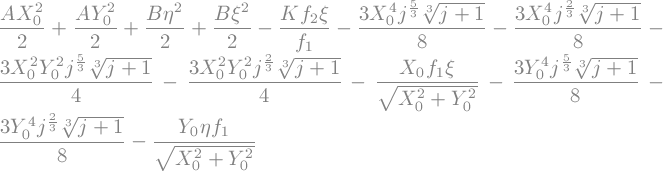

In [35]:
H1_expr.expand().simplify()

In [58]:
a, e, ep, om2e, tau, pom, Phi = symbols("alpha e e_p \omega_{2e} tau varpi Phi")

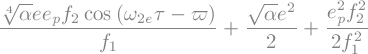

In [59]:
Phi_expr = sqrt(a)*e**2/2 + a**Rational(1,4)*e*ep*f2*cos(om2e*tau-pom)/f1 + ep**2*f2**2/2/f1**2
display(Phi_expr)

In [60]:
e_expr = solve(Phi -Phi_expr,e)[0]

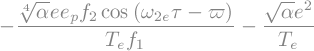

In [78]:
Te, Tm = symbols("T_e T_m")
(Phi_expr.diff(e)*(-e/Te)).expand()

## Dissipation: limit $e_p\ll e$

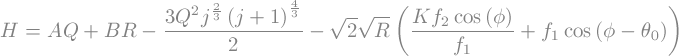

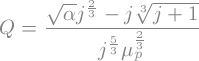

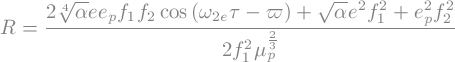

In [90]:
Q, R, th0, phi, H = symbols("Q R theta_0 phi H")
A, B, K, f1, f2, j, mup, a, Te, Tm = symbols("A B K f_1 f_2 j mu_p alpha T_e T_m")
H_expr = -Rational(3,2)*j**Rational(2,3)*(j+1)**Rational(4,3)*Q**2 + A*Q + B*R - sqrt(2*R)*(f1*cos(phi-th0)+f2/f1*K*cos(phi))
R_expr = ((sqrt(a)*e**2/2 + a**Rational(1,4)*e*ep*f2*cos(om2e*tau-pom)/f1 + ep**2*f2**2/2/f1**2)/mup**Rational(2,3)).simplify()
Q_expr = ((sqrt(a)/j - 1/(j**Rational(2,3)/(j+1)**Rational(1,3)))/mup**Rational(2,3)).simplify()
display(Eq(H,H_expr))
display(Eq(Q,Q_expr))
display(Eq(R,R_expr))

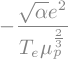

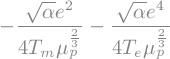

In [100]:
display((R_expr.diff(e)*(-e/Te)).subs(ep,0).expand())
display((R_expr.diff(a)*(-a/Tm-a*e**2/Te)).subs(ep,0).expand())

Limit of $e_p\ll e\Rightarrow \dot Q_{\rm dis}\approx -2Q/T_e$ 

In [97]:
(Q_expr.diff(e)*(-e/Te)).expand()

In [102]:
(1e-4/3)**(1./3)*0.3

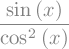

In [3]:
x = symbols("x")
(1/cos(x)).diff(x)

In [5]:
print((1e-4*0.05)**0.5)
print(1e-4**(2./3))

0.00223606797749979
0.0021544346900318847


In [9]:
print((6e-6*0.018)**0.5)
print(6e-6**(2./3))

0.00032863353450309965
0.00033019272488946284


In [8]:
(6e-6)**(1./3)

0.0181712059283214